In [2]:
% cd E:\GitHub\shot_logs.csv

E:\GitHub\shot_logs.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
% matplotlib inline

In [4]:
shot =pd.read_csv('shot_logs.csv')

In [5]:
shot.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148


In [39]:
shot.where(lambda x: x.SHOT_RESULT=='made' , lambda x: x.LOCATION=='A', axis=0).groupby(['player_name','CLOSEST_DEFENDER']).size().sort_values()

player_name        CLOSEST_DEFENDER  
john henson        Covington, Robert         1
kj mcdaniels       Roberson, Andre           1
                   Randolph, Shavlik         1
                   Price, A.J.               1
                   Payton, Elfrid            1
                   Patterson, Patrick        1
                   Parker, Jabari            1
                   Oladipo, Victor           1
                   Muhammad, Shabazz         1
                   Seraphin, Kevin           1
                   Morrow, Anthony           1
                   Monroe, Greg              1
                   Miles, CJ                 1
                   McCollum, CJ              1
                   Martin, Kevin             1
                   Martin, Cartier           1
                   Marion, Shawn             1
                   Mack, Shelvin             1
                   Lowry, Kyle               1
                   Morris, Markieff          1
                   Slo

## Whenever Griffin balke is on attack, avoid Enes ,Kanter on defense.

In [8]:
shot.where(lambda x: x.SHOT_RESULT=='missed' , lambda x: x.LOCATION=='A', axis=0).groupby(['player_name','CLOSEST_DEFENDER']).size().sort_values()

player_name          CLOSEST_DEFENDER      
jrue holiday         Boozer, Carlos                1
kris humphries       Antetokounmpo, Giannis        1
                     Anderson, Alan                1
                     Allen, Lavoy                  1
                     Aldemir, Furkan               1
kostas papanikolaou  Young, Nick                   1
                     Wroten, Tony                  1
                     Wright, Dorell                1
                     Williams, Shawne              1
                     Udrih, Beno                   1
                     Thompson, Jason               1
                     Thompson, Hollis              1
                     Thomas, Lance                 1
                     Telfair, Sebastian            1
                     Scott, Mike                   1
                     Randolph, Zach                1
                     Prigioni, Pablo               1
                     Price, Ronnie                 1
  

## Always put Serge, Ibaka on defence side

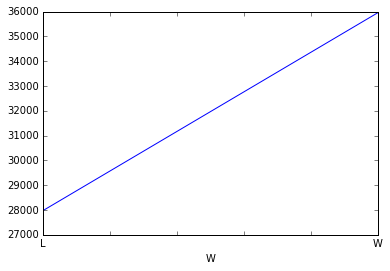

In [9]:
shot.where(lambda x: x.LOCATION=='H').groupby(['W']).size().plot()

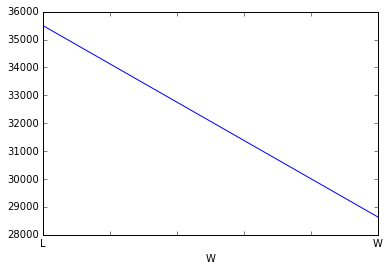

In [10]:
shot.where(lambda x: x.LOCATION=='A').groupby(['W']).size().plot()

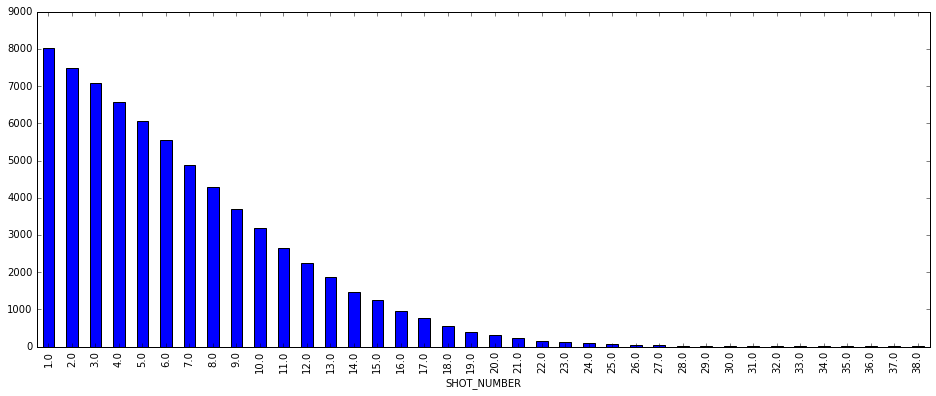

In [11]:
shot.where(lambda x: x.SHOT_RESULT=='missed').groupby('SHOT_NUMBER').size().plot(kind='bar', figsize=[16,6])

for any particular game, we always got made or missed in its initial shots(1:15)

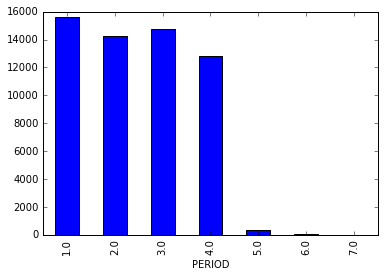

In [12]:
shot.where(lambda x: x.SHOT_RESULT=='made').groupby('PERIOD').size().plot(kind='bar')

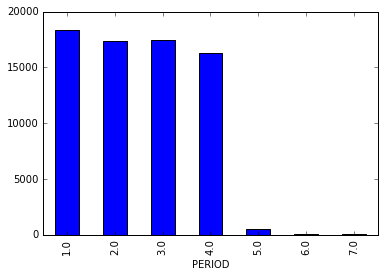

In [13]:
shot.where(lambda x: x.SHOT_RESULT=='missed').groupby('PERIOD').size().plot(kind='bar')

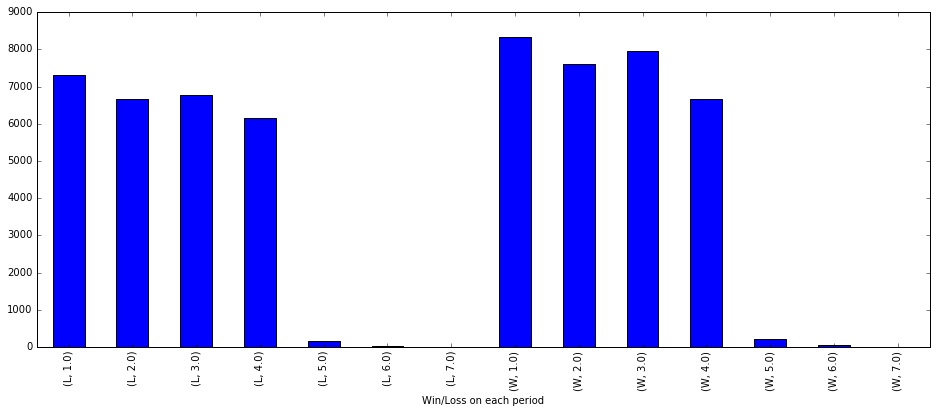

In [14]:
shot.where(lambda x: x.SHOT_RESULT=='made').groupby(['W','PERIOD']).size().plot(kind='bar', figsize=[16,6], stacked=True)
plt.xlabel('Win/Loss on each period')

In [15]:
shot.groupby(['W','player_name']).size().sort_values()

W  player_name      
W  travis wear            6
L  alan crabbe            8
   greg smith            14
W  cole aldrich          16
   chase budinger        16
   jerome jordan         21
   robbie hummel         26
L  tyler hansbrough      27
W  aaron gordon          30
   greg smith            33
   pablo prigioni        35
L  thabo sefolosha       36
   pero antic            37
   hedo turkoglu         37
   joey dorsey           38
   andrew bogut          39
W  quincy acy            39
   joe harris            41
   shabazz muhammad      41
   alonzo gee            42
L  mike miller           43
W  jakarr sampson        44
   jose calderon         49
   anthony bennett       49
   kyle oquinn           49
   mike miller           51
   shane larkin          53
L  leandro barbosa       54
   bismack biyombo       54
   shaun livingston      55
                       ... 
   time hardaway jr     497
W  pau gasol            499
L  gordon hayward       505
W  dirk nowtizski       508

W  mnta ellis           680
   lebron james         706
   james harden         724
   lamarcus aldridge    739
   klay thompson        769
   stephen curry        769
   
L  victor oladipo       533
W  chris paul           537
   zach randolph        540
L  rudy gay             561
W  al horford           568
   russell westbrook    568
   marc gasol           575
L  carmelo anthony      583
W  blake griffin        592
   kyrie irving         598
   paul millsap         602
L  nikola vucevic       615
W  damian lillard       633
L  andrew wiggins       638  

In [16]:
s_dam=shot[shot.player_name=='damian lillard']
s_dam.SHOT_RESULT.value_counts()

missed    560
made      426
Name: SHOT_RESULT, dtype: int64

In [17]:
s_and = shot[shot.player_name=='andrew wiggins']
s_and.SHOT_RESULT.value_counts()

missed    449
made      348
Name: SHOT_RESULT, dtype: int64

## Certainly, we can say that every player counts but not responsible for winning solely

In [18]:
shot.groupby(['SHOT_RESULT','W']).size()

SHOT_RESULT  W
made         L    27098
             W    30807
missed       L    36376
             W    33788
dtype: int64

In [19]:
shot.where(lambda x: x.SHOT_RESULT=='made').groupby('TOUCH_TIME').size()

TOUCH_TIME
-14.0       1
-10.3       1
-8.5        1
-7.5        1
-6.7        1
-6.1        1
-5.3        1
-4.7        1
-4.6        1
-4.3        2
-4.1        1
-4.0        1
-3.8        1
-3.5        1
-3.3        1
-3.2        1
-1.9        1
-1.3        1
-1.1        2
-0.8        1
-0.7        2
-0.6        4
-0.5        6
-0.4        7
-0.3       14
-0.2       17
-0.1       27
 0.0     1451
 0.1      533
 0.2      559
         ... 
 20.1       4
 20.2       4
 20.4       5
 20.5       2
 20.6       3
 20.7       1
 20.8       1
 21.0       4
 21.1       1
 21.2       4
 21.3       3
 21.5       4
 21.6       4
 21.7       3
 21.8       1
 21.9       1
 22.0       3
 22.1       1
 22.2       1
 22.3       2
 22.4       1
 22.6       1
 22.8       1
 22.9       1
 23.2       1
 23.3       1
 23.4       1
 23.9       1
 24.5       1
 24.9       1
dtype: int64

When player is keeping ball for shorter duration, he is more likely to made it to basket

In [22]:
d=shot.where(lambda x: x.W=='W', lambda x:x.FINAL_MARGIN <0, axis=1)
len(d)

128069

In [34]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#AAFFAA'])
cm_light = ListedColormap (['#FFAAAA', '#AAFFAA'])

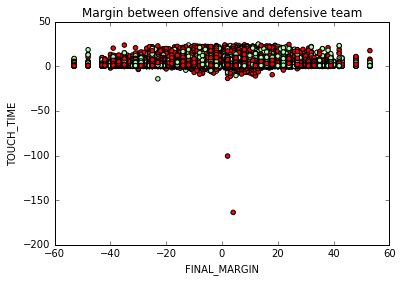

In [31]:
plt.scatter(shot.FINAL_MARGIN, shot.TOUCH_TIME, c= [cm_bright.colors[i] for i in shot.SHOT_RESULT=='made'])
plt.title('Margin between offensive and defensive team')
plt.xlabel('FINAL_MARGIN')
plt.ylabel('TOUCH_TIME')

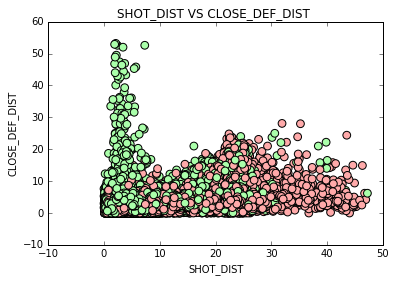

In [37]:
plt.scatter(shot.SHOT_DIST, shot.CLOSE_DEF_DIST, c= [cm_light.colors[i] for i in shot.SHOT_RESULT=='made'], s=60)
plt.title('SHOT_DIST VS CLOSE_DEF_DIST ')
plt.xlabel('SHOT_DIST')
plt.ylabel('CLOSE_DEF_DIST')

## This is quite evident from graph that lesser shot distance are more likely to result in made attempt, while close_def_dist has no relation with shot_distance

Conclusions:
1. Whenever Griffin, Blake in on attack, avoid Enes, Kanter on defense.
2. Always try to utilize Serge, Ibaka on defense side.
3. There were more numbers of wins in homeground compared to other location.
4. More attempts were made in initial periods.
5. There were team effort involved in bringing the victory as players who missed the most, still got through the game.
6. When player keeping ball for less time, he is more likely to made it to basket.
7. As evident from graph, more closer distance from the basket will help player to made it.
